# oscnext_lvl7 Dataset
The Dataset includes both neutrino and muon events. <br>
For information on how to use sqlite3 see documentation: https://docs.python.org/3/library/sqlite3.html 
1) Fetching table and column names:

In [2]:
db_path = '/remote/ceph/user/o/oersoe/workshop/data/oscnext_lvl7/oscnext_lvl7.db'

In [3]:
import sqlite3
import pandas as pd
import numpy as np

con = sqlite3.connect(db_path)

# Getting table and column names
query = 'select name from sqlite_master where type = "table"'
table_names = pd.read_sql(query,con)

for table_name in table_names['name']:
    print("Table name:", table_name)
    # Getting column names of table
    query = f"SELECT * FROM {table_name} LIMIT 1"
    column_names = pd.read_sql(query,con).columns
    print("Column names:", np.array(column_names))

Table name: truth
Column names: ['EventID' 'RunID' 'SubEventID' 'SubrunID' 'azimuth' 'elasticity' 'energy'
 'event_no' 'event_time' 'interaction_type' 'pid' 'position_x'
 'position_y' 'position_z' 'sim_type' 'zenith']
Table name: SRTTWOfflinePulsesDC
Column names: ['charge' 'dom_time' 'dom_x' 'dom_y' 'dom_z' 'event_no' 'pmt_area' 'rde'
 'width']
Table name: RetroReco
Column names: ['L4_MuonClassifier_Data_ProbNu' 'L4_NoiseClassifier_ProbNu'
 'L7_MuonClassifier_FullSky_ProbNu' 'L7_PIDClassifier_FullSky_ProbTrack'
 'azimuth_retro' 'azimuth_sigma' 'cascade_energy_retro' 'energy_retro'
 'energy_sigma' 'event_no' 'osc_weight' 'position_x_retro'
 'position_x_sigma' 'position_y_retro' 'position_y_sigma'
 'position_z_retro' 'position_z_sigma' 'time_retro' 'time_sigma'
 'track_energy_retro' 'track_length_retro' 'zenith_retro' 'zenith_sigma']


2) Plotting distribution of pid value (particle identification)

Number of neutrio events in dataset: 320826 This is equal to 66.67 %
Number of muons events in dataset: 160413 This is equal to 33.33 %


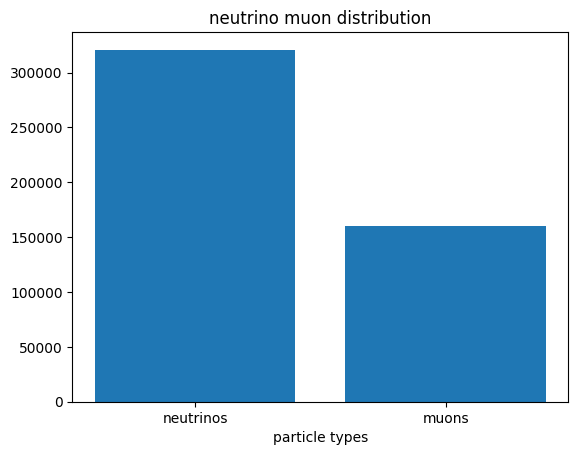

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

# Important pid values:
dict = {'election neutrino': 12, 
        'muon': 13, 
        'muon neutrino': 14, 
        'tau neutrino': 16}

sql = f"SELECT pid FROM truth"
column_data = pd.read_sql(sql, con)
column_data = np.absolute(np.array(column_data).reshape(len(column_data)))
count = Counter(column_data)
neutrinos = count[12.0] + count[14.0] + count[16.0]
muons = count[13.0]
print("Number of neutrio events in dataset:", neutrinos, f"This is equal to {round(neutrinos/len(column_data)*100, 2)} %")
print("Number of muons events in dataset:", muons, f"This is equal to {round(muons/len(column_data)*100, 2)} %")
plt.bar(['neutrinos', 'muons'], height = [neutrinos, muons])

# Show plot
plt.title("neutrino muon distribution")
plt.xlabel('particle types')
plt.show()

3) Plotting distribution event energy

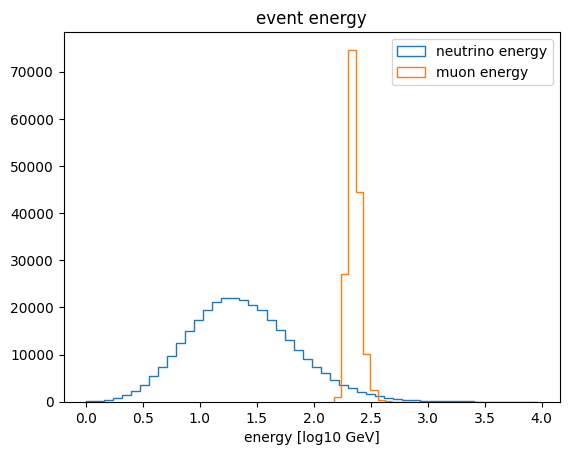

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pid_dict = {
    'neutrinos':[12,14,16], 
    'muons': [13]
}

sql = "SELECT pid, energy FROM truth"
column_data = pd.read_sql(sql, con)

neutrinos = np.log10(column_data[column_data.pid.abs().isin(pid_dict['neutrinos'])].energy.copy())
muons = np.log10(column_data[column_data.pid.abs().isin(pid_dict['muons'])].energy.copy())
plt.hist(neutrinos, histtype = 'step', label= f'neutrino energy', bins=50, color='tab:blue')
plt.hist(muons, histtype = 'step', label= f'muon energy', bins=20, color='tab:orange')


# Show plot
plt.title("event energy")
plt.legend()
plt.xlabel('energy [log10 GeV]')


plt.show()

 

4) Plotting distribution of xyz-coordinates of sensors 

0
1
2


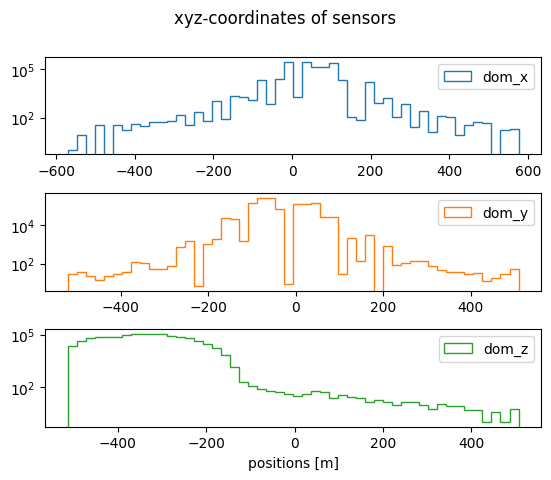

In [4]:
# WARNING: This cell can take up to 10 minutes to run!

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bins = 50
fig, ax = plt.subplots(3)
colors = ['tab:blue', 'tab:orange', 'tab:green']
query = 'SELECT event_no FROM truth'
event_nos = pd.read_sql(query,con).sample(frac= 0.1).reset_index(drop = True)

for count, i in enumerate(['dom_x', 'dom_y', 'dom_z']):
    query = f'SELECT {i} FROM SRTTWOfflinePulsesDC WHERE event_no in {str(tuple(event_nos["event_no"]))}'
    column_data = pd.read_sql(query,con)
    print(count)
    ax[count].hist(column_data, histtype = 'step', label= i, bins=bins, color=colors[count])
    ax[count].legend()
    ax[count].set_yscale('log')


# Show plot
fig.suptitle("xyz-coordinates of sensors")
plt.subplots_adjust(hspace=0.4)
plt.xlabel('positions [m]')


plt.show()
 

5) Plotting distribution of azimuth and zenith angle

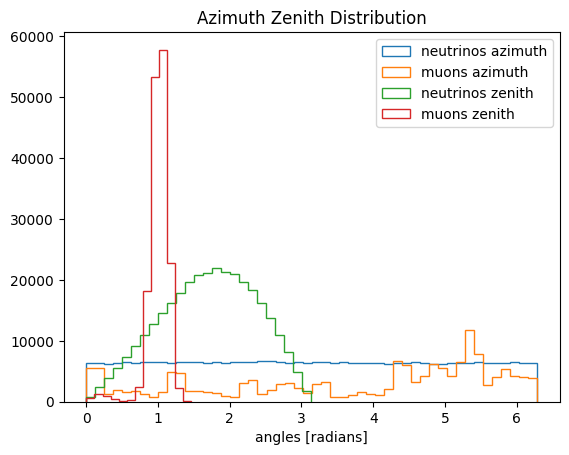

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bins = [[50,50], [25,13]]
pid_dict = {
    'neutrinos':[12,14,16], 
    'muons': [13]
}

for count, i in enumerate(['azimuth', 'zenith']):
    sql = f"SELECT pid, {i} FROM truth"
    column_data = pd.read_sql(sql, con)
    neutrinos = column_data[column_data.pid.abs().isin(pid_dict['neutrinos'])][i].copy()
    muons = column_data[column_data.pid.abs().isin(pid_dict['muons'])][i].copy()
    plt.hist(neutrinos, histtype = 'step', label= f'neutrinos {i}', bins=bins[count][0])
    plt.hist(muons, histtype = 'step', label= f'muons {i}', bins=bins[count][1])

# Show plot
plt.title("Azimuth Zenith Distribution")
plt.legend()
plt.xlabel('angles [radians]')
plt.show()

